In [1]:
!pip install tensorflow
!pip install pillow
!pip install scipy
!pip install matplotlib

^C


In [2]:
import os
current_directory = os.getcwd()
print(current_directory)

C:\Users\76392


In [3]:
import tensorflow as tf
import PIL
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense, Softmax
from tensorflow.keras.applications import mobilenet as _mobilenet
import random
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import cm
import math
from decimal import Decimal, localcontext
import platform  # 用于检测操作系统

def opF(path):
    # 检测操作系统
    system = platform.system()
    
    if system == "Darwin" or system == "Linux":  # 适用于macOS和Linux的打开文件命令
        _ = call(['open', path])
    elif system == "Windows":  # 适用于Windows的打开文件命令
        os.startfile(path)

def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3), 
    include_top=True, 
    pooling='avg'
)

ryoanJi_Path = "C:/Users/76392/DSC01012.jpg"
ensure_folder_exists("Resources")  
opF(ryoanJi_Path)

ryoanJi_image = load_image(ryoanJi_Path)
featureRyoanJi = model.predict(ryoanJi_image)[0]



1/1 [==============================] - 1s 624ms/step


In [4]:
featureRyoanJi.size

1000

In [5]:
featureRyoanJi

array([6.47423622e-06, 1.20189640e-07, 2.33533847e-05, 4.44326952e-06,
       3.66226482e-06, 8.20189427e-07, 1.05611605e-06, 1.20726472e-05,
       1.04101252e-06, 6.38783376e-06, 1.25983732e-07, 2.37293122e-07,
       8.82983727e-07, 4.63066868e-07, 4.65801037e-07, 9.98334713e-07,
       1.91991802e-07, 7.24833944e-06, 2.72815032e-05, 1.10544363e-06,
       9.06169817e-07, 1.30564331e-05, 6.90739020e-04, 1.04539748e-03,
       6.63174148e-07, 1.90670580e-05, 5.99764244e-05, 1.55824982e-05,
       3.23542663e-05, 3.72125470e-07, 1.09709003e-06, 8.31372859e-07,
       8.93941774e-07, 2.47170220e-07, 4.52656707e-07, 1.13306237e-06,
       1.12672967e-06, 4.42364687e-08, 1.07077340e-05, 3.87294131e-05,
       8.59253214e-06, 1.66603786e-05, 5.02328512e-05, 1.39710664e-06,
       2.75498201e-06, 5.46920717e-07, 2.60449929e-06, 1.62944821e-06,
       3.61919592e-05, 1.36382936e-04, 1.80662013e-04, 7.14888813e-07,
       2.48375432e-06, 4.86519809e-07, 1.34763047e-06, 6.98536269e-07,
      

In [6]:
import platform
import os
import numpy as np
import tensorflow as tf

def opF(path):
    system = platform.system() 
    if system == "Darwin" or system == "Linux":  
        _ = call(['open', path])
    elif system == "Windows":  
        os.startfile(path)

def load_image(img_file, target_size=(224,224)):
    X = np.zeros((1, *target_size, 3))
    X[0, ] = np.asarray(tf.keras.preprocessing.image.load_img(
        img_file, 
        target_size=target_size)
    )
    X = tf.keras.applications.mobilenet.preprocess_input(X)
    return X

def ensure_folder_exists(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

model = tf.keras.applications.mobilenet.MobileNet(
    input_shape=(224, 224, 3),
    include_top=True,
    pooling='avg')

sankeiEn = r'D:\YeqinHUANG_Collection\photo\1675275469766.jpeg'
opF(sankeiEn)
sankeiEn_image = load_image(sankeiEn)
featureSankeiEn = model.predict(sankeiEn_image)[0]

englishGarden = r'D:\YeqinHUANG_Collection\photo\Screenshot_20230204_170400_com.tencent.mm.jpg'
opF(englishGarden)
englishGarden_image = load_image(englishGarden)
featureEnglishGarden = model.predict(englishGarden_image)[0]
#这段代码对两张图像分别提取了特征向量，这些特征向量可以用于后续的任务，比如图像分类、相似性比较等。

1/1 [==============================] - 0s 39ms/step


In [7]:
np.linalg.norm(featureSankeiEn - featureEnglishGarden)

0.7074478

In [8]:
np.linalg.norm(featureRyoanJi - featureEnglishGarden)

1.0604388

In [9]:
np.linalg.norm(featureRyoanJi - featureSankeiEn)

1.0838643

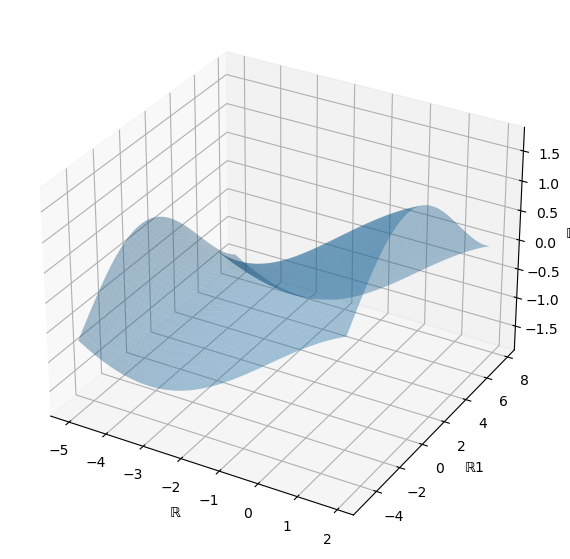

In [10]:
fig = plt.figure(figsize = (7,7))
ax= fig.add_subplot(111, projection= '3d')
ax = fig.gca()

X = np.arange(-5, 2, 0.1)
Y = np.arange(-5, 8, 0.25)
X, Y = np.meshgrid(X, Y)

Z = np.sin(X/2) + np.cos(Y/3)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.4)

ax.set_xlabel('ℝ')
#ax.set_xlim(-40, 40)
ax.set_ylabel('ℝ1')
#ax.set_ylim(-40, 40)
ax.set_zlabel('ℝ2')
#ax.set_zlim(-100, 100)

plt.show()

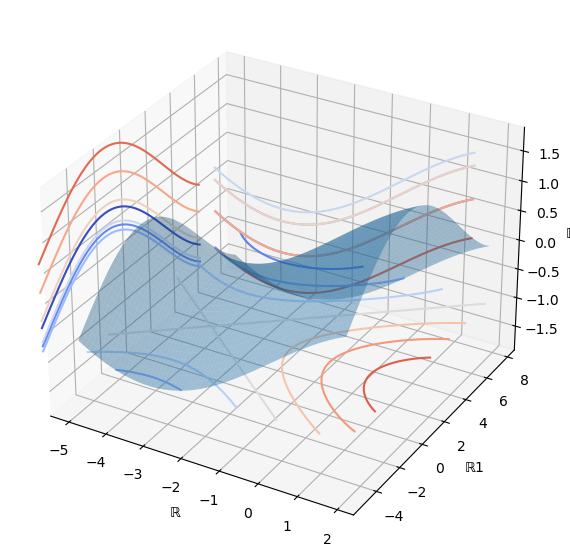

In [11]:
##### import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# 创建一个 3D 图形窗口
fig = plt.figure(figsize=(7, 7))

# 在图形窗口中添加 3D 子图
ax = fig.add_subplot(111, projection='3d')

# 绘制 3D 曲面
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.4)

# 在 z、x、y 方向上添加轮廓线
cset = ax.contour(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-6, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=6, cmap=cm.coolwarm)

# 设置坐标轴标签
ax.set_xlabel('ℝ')
ax.set_ylabel('ℝ1')
ax.set_zlabel('ℝ2')
# 显示图形
plt.show()


In [12]:
model = tf.keras.applications.mobilenet.MobileNet()
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 14, 14, 512)       2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D  (None, 14, 14, 512)       4608      
 )        

In [93]:
import requests
from bs4 import BeautifulSoup
import os
from urllib.parse import urljoin  

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36 Edg/118.0.2088.76'}

def crawl_html(url):
    '''
        解析网页
    :param url: 请求地址
    :return: 解析后的网页源码
    '''
    response = requests.get(url=url, headers=headers)
    return response.text

def download_img(img_url, folder='147777777777images'):
    if not os.path.exists(folder):
        os.makedirs(folder)
    img_url = urljoin(url, img_url)
    img_data = requests.get(img_url).content
    img_name = os.path.join(folder, os.path.basename(img_url.split('@')[0]))
    with open(img_name, 'wb') as img_file:
        img_file.write(img_data)
        print(f"已下载：{img_name}")

def parse_html(html):
    soup = BeautifulSoup(html, 'html.parser')
    img_list = soup.select('ul.gallery_list li a img')
    for img in img_list:
        img_url = img['src']
        download_img(img_url, folder=r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep')

# page1
url = 'http://panorama.cn/tupian/shanyang.html'
html = crawl_html(url)
parse_html(html)


已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ8146423507.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6541021404.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6408599683.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6531695971.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ7100167159.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6307919724.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ9107371789.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ9130458944.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ9130458955.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6833502689.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6579123595.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ8666163825.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6649329994.jpg
已下载：D:\YeqinHUANG_Collection\ucl\week3\IMAGES\sheep\QJ6177549485.jpg
已下载：D:\YeqinHUANG_Collection\ucl\w

KeyboardInterrupt: 

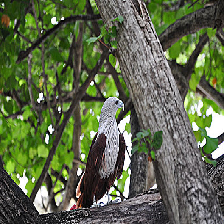

In [35]:
owl_image_id = os.listdir(r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\owl')[0]
owl_path = os.path.join(r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\owl',owl_image_id)
owl_image = load_image(owl_path)

tf.keras.preprocessing.image.load_img(owl_path, target_size=(224,224))

In [36]:
print(f'shape: {owl_image.shape}')
print(f'type: {type(owl_image)}')

#shape: (1, 224, 224, 3) 表示图像的形状是 (1, 224, 224, 3)。这个形状的解释是：图像是一个四维数组，第一个维度表示样本数量，这里是1，接下来的两个维度表示图像的高度和宽度，最后一个维度表示图像的通道数（这里是RGB，所以是3）。
#type: <class 'numpy.ndarray'> 表示图像的数据类型是 NumPy 数组。这对于深度学习模型来说是一个常见的数据类型，因为模型通常接受 NumPy 数组作为输入。

shape: (1, 224, 224, 3)
type: <class 'numpy.ndarray'>


In [37]:
model.predict(owl_image)

1/1 [==============================] - 1s 682ms/step


array([[0.6337363 , 0.36626363]], dtype=float32)

In [38]:
model = tf.keras.applications.mobilenet.MobileNet(
# The 3 is the three dimensions of the input: r,g,b.
  input_shape=(224, 224, 3), 
  include_top=False, 
  pooling='avg'
)

In [39]:
owl_image = load_image(owl_path)
f = model.predict(owl_image)

1/1 [==============================] - 0s 421ms/step


In [40]:
print(f)

[[0.9339313  0.01021149 0.21496779 ... 0.01920759 0.4915985  0.00517676]]


In [53]:
x = Dropout(rate=0.4)(model.output)
# This determines the number of outputs, and thus the number of categories, in my test case 2: dog or cat
x = Dense(4)(x)
x = Softmax()(x)
model= Model(model.inputs, x)

In [54]:
for layer in model.layers[:-3]:
    layer.trainable = False

In [55]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy'
)

In [94]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2,  
    horizontal_flip=True,
    validation_split = 0.2
)

ensure_folder_exists(r'D:\YeqinHUANG_Collection\ucl\week3\training_aug')

training = datagen.flow_from_directory( 
    r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES', 
    target_size=(224, 224),
    save_to_dir=r'D:\YeqinHUANG_Collection\ucl\week3\training_aug',
    subset='training'
)

ensure_folder_exists(r'D:\YeqinHUANG_Collection\ucl\week3\validation_aug')
validation = datagen.flow_from_directory( 
    r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES', 
    target_size=(224, 224),
    save_to_dir=r'D:\YeqinHUANG_Collection\ucl\week3\validation_aug',
    subset='validation'
)


Found 306 images belonging to 4 classes.
Found 75 images belonging to 4 classes.


In [95]:
training.class_indices

{'cat': 0, 'lizard': 1, 'owl': 2, 'sheep': 3}

In [96]:
batch_size = 32

history = model.fit(
    x=training,
    steps_per_epoch=training.samples//batch_size,
    epochs=4,
    validation_data=validation,
    validation_steps=validation.samples//batch_size
)

Epoch 1/4
9/9 [==============================] - 12s 1s/step - loss: 1.4803 - val_loss: 1.4372
Epoch 2/4
9/9 [==============================] - 10s 1s/step - loss: 1.4664 - val_loss: 1.4455
Epoch 3/4
9/9 [==============================] - 11s 1s/step - loss: 1.4632 - val_loss: 1.4352
Epoch 4/4
9/9 [==============================] - 11s 1s/step - loss: 1.4446 - val_loss: 1.4454


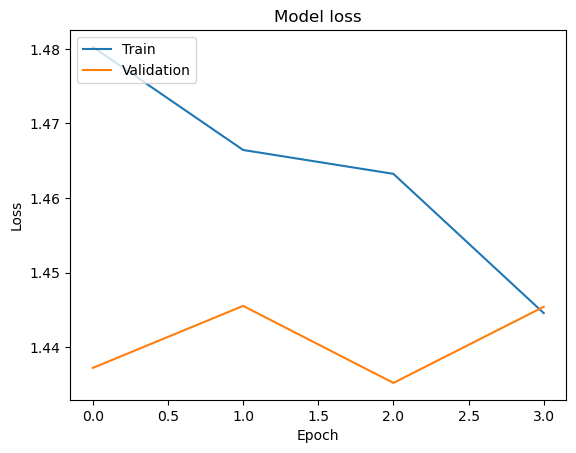

In [97]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [139]:
random_lizard = random.choice(os.listdir(r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\lizard'))
lizard_path = os.path.join(r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\lizard', random_lizard)
lizard = load_image(lizard_path)

random_owl = random.choice(os.listdir(r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\owl'))
owl_path = os.path.join(r'D:\YeqinHUANG_Collection\ucl\week3\IMAGES\owl', random_owl)
owl = load_image(owl_path)


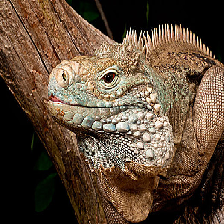

In [140]:
tf.keras.preprocessing.image.load_img(lizard_path, target_size=(224,224))

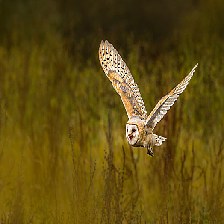

In [141]:
tf.keras.preprocessing.image.load_img(owl_path, target_size=(224,224))

In [142]:
training.class_indices

{'cat': 0, 'lizard': 1, 'owl': 2, 'sheep': 3}

In [143]:
print(f'''cat:{np.round(model.predict(cat),2)}''')

1/1 [==============================] - 0s 54ms/step
cat:[[0.17 0.19 0.39 0.25]]


In [144]:
print(f'''lizard:{np.round(model.predict(lizard),2)}''')

1/1 [==============================] - 0s 44ms/step
lizard:[[0.24 0.17 0.33 0.25]]


In [145]:
lions_path = r'D:\YeqinHUANG_Collection\ucl\week3\lions.jpg'
lions = load_image(lions_path)

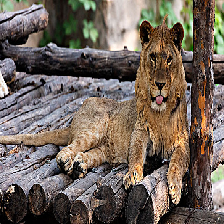

In [146]:
tf.keras.preprocessing.image.load_img(lions_path, target_size=(224,224))

In [148]:
print(f'''lions:{np.round(model.predict(lions),2)}''')

1/1 [==============================] - 0s 54ms/step
lions:[[0.19 0.19 0.37 0.25]]
